In [1]:
import pandas as pd                      # For data handling
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For plotting
import seaborn as sns                    # For prettier plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression      # For Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluation


In [5]:
# Load dataset
df = pd.read_csv('Housing.csv')  # Make sure this file is in your working directory

In [6]:
# Display first 5 rows
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
# Check info about data types and nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [8]:
# Convert categorical columns into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check the transformed dataset
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [9]:
# Define Feeature & target
X = df[['area']]         # Feature: area
y = df['price']          # Target: price

In [10]:
# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict & Evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Simple Linear Regression Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

Simple Linear Regression Results:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R²: 0.27287851871974644


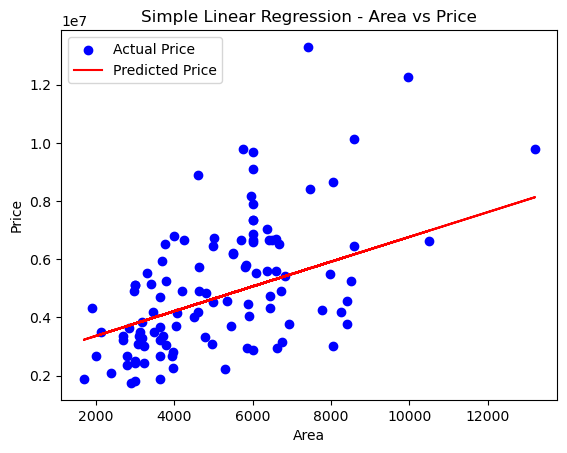

In [13]:
# Plot - Simple Linear Regression
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression - Area vs Price')
plt.legend()
plt.show()

In [14]:
# Multiple Linear Regression using all features
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred = model_multiple.predict(X_test)

In [15]:
# Evaluation - Multiple Linear Regression
print("\nMultiple Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))


Multiple Linear Regression Results:
MAE: 970043.4039201641
MSE: 1754318687330.6646
R^2: 0.6529242642153182


In [16]:
# Coefficients
coeff_df = pd.DataFrame(model_multiple.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)


Feature Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


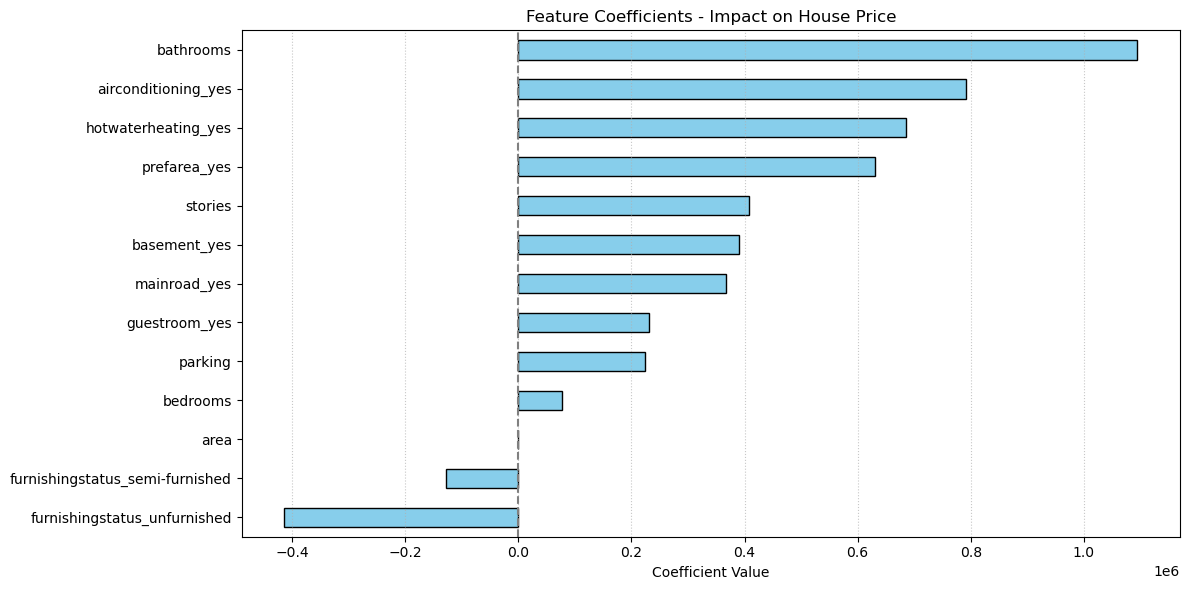

In [17]:
# Plotting Feature Coefficients as Bar Chart
plt.figure(figsize=(12, 6))
coeff_df['Coefficient'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Coefficients - Impact on House Price')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.grid(True, axis='x', linestyle=':', alpha=0.7)
plt.show()